In [35]:
import numpy as np


In [36]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['text.usetex'] = True
params = {
    "backend": "ps",
    "axes.labelsize": 18,
    "font.size": 18,
    "legend.fontsize": 14,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Computer Modern Roman",
    "legend.frameon": True,
    "savefig.dpi": 100,
    "axes.linewidth": 1.5,
    'xtick.major.size' : 10,
    'xtick.major.width': 1,
    'xtick.minor.size': 7,
    'xtick.minor.width': 1,
    'ytick.major.size' : 10,
    'ytick.major.width': 1,
    'ytick.minor.size': 7,
    'ytick.minor.width': 1,
    'axes.xmargin' : 0,
    'axes.ymargin' : 0,
}
plt.rcParams.update(params)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

In [37]:
def import_npz(npz_file):
    Data = np.load(npz_file, allow_pickle=True)
    for varName in Data:
        globals()[varName] = Data[varName]

import_npz('../../data/charge_qubit/charge_qubit_SNR.npz')
import_npz('../../data/charge_qubit/charge_qubit_floquet_spectrum_w_r=1.3.npz')

fname_0 = ['w_r=1.095_w_r_disp=1.095.npz', 'w_r=1.15_w_r_disp=1.095.npz', 'w_r=1.5_w_r_disp=1.095.npz']
fname_1 = ['w_r=0.3_w_r_disp=0.9.npz', 'w_r=0.8_w_r_disp=0.9.npz', 'w_r=0.9_w_r_disp=0.9.npz']

w_list_0 = []
exp_a_0 = []
exp_a_an_0 = []
exp_a_disp_0 = []
exp_a_disp_an_0 = []
g_parallel_high = []

w_list_1 = []
exp_a_1 = []
exp_a_an_1 = []
exp_a_disp_1 = []
exp_a_disp_an_1 = []
g_parallel_low = []

for j in range(3):
    data = np.load('../../data/charge_qubit/charge_qubit_single_case_A_q=0.05_'+fname_0[j])
    w_list_0.append(data['w'])
    exp_a_0.append(data['exp_a'])
    exp_a_an_0.append(data['exp_a_an'])
    exp_a_disp_0.append(data['exp_a_disp'])
    exp_a_disp_an_0.append(data['exp_a_disp_an'])
    g_parallel_high.append(data['g_parallel']*2/kappa)

for j in range(3):
    data = np.load('../../data/charge_qubit/charge_qubit_single_case_A_q=0.05_'+fname_1[j])
    w_list_1.append(data['w'])
    exp_a_1.append(data['exp_a'])
    exp_a_an_1.append(data['exp_a_an'])
    exp_a_disp_1.append(data['exp_a_disp'])
    exp_a_disp_an_1.append(data['exp_a_disp_an'])
    g_parallel_low.append(data['g_parallel']*2/kappa)

    tlist = data['tlist']
    kappa = data['kappa']
    qubit_state_list = data['qubit_state_list']
    g = data['g']
    wq = data['wq']

 /tmp/ipykernel_7842/2923699327.py: 199UserWarning: The figure layout has changed to tight
 /tmp/ipykernel_7842/2923699327.py: 199

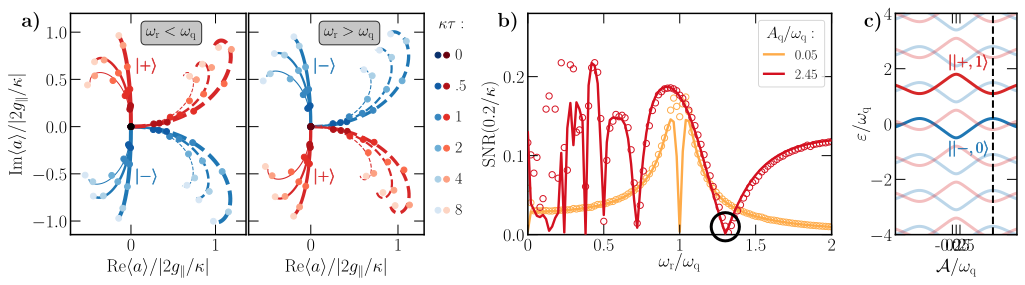

In [38]:
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
from matplotlib.legend_handler import HandlerTuple
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

cmap_plot = plt.get_cmap('YlOrRd')
norm = plt.Normalize(-2,3)
colors_plot = cmap_plot(norm([i for i in range(len(Alist)+1)]))

props = dict(boxstyle='round', facecolor='#b8b8b8a6', alpha=0.8)

fig = plt.figure(figsize=(17,4), layout="constrained")

gs0 = gridspec.GridSpec(1, 2, figure=fig, width_ratios=[0.8, 1], wspace=0.15)

gs00 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs0[0], wspace=0.02, width_ratios=[1, 1, 0.2])

ax1 = fig.add_subplot(gs00[0])
ax2 = fig.add_subplot(gs00[1])
ax = [ax1, ax2]

gs01 = gs0[1].subgridspec(1, 2, wspace=0.3, hspace=0.5, width_ratios=[1, 0.4])

ax_SNR = fig.add_subplot(gs01[0])
ax_replica = fig.add_subplot(gs01[1])

###################### First column #################################
x_list = [0,0.5,1,2,4,8]

norm = mpl.colors.Normalize(vmin=0, vmax=len(x_list))

cmap_b = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.colormaps['Blues'].reversed())
cmap_b.set_array([])

cmap_r = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.colormaps['Reds'].reversed())
cmap_r.set_array([])

cmap = [cmap_b, cmap_r]

dictionary = {}

for index_w,w in enumerate(w_list_0):

    for q_idx,qubit_state in enumerate(qubit_state_list):

        if qubit_state == 0:
            p1, = ax[0].plot(exp_a_an_0[index_w][0].real/np.abs(g_parallel_high[index_w]), exp_a_an_0[index_w][0].imag/np.abs(g_parallel_high[index_w]), 'tab:blue', zorder = 0, lw = 1+1.5*(index_w))
            q1, = ax[0].plot(exp_a_disp_an_0[index_w][0].real/np.abs(g_parallel_high[index_w]), exp_a_disp_an_0[index_w][0].imag/np.abs(g_parallel_high[index_w]), ls='--', c='tab:blue', zorder = 0, lw = 1+1.5*(index_w))
            p2, = ax[1].plot(exp_a_an_1[index_w][0].real/np.abs(g_parallel_low[index_w]), exp_a_an_1[index_w][0].imag/np.abs(g_parallel_low[index_w]), 'tab:blue', zorder = 0, lw = 0+1.1*(len(w_list_0)-index_w))
            q2, = ax[1].plot(exp_a_disp_an_1[index_w][0].real/np.abs(g_parallel_low[index_w]), exp_a_disp_an_1[index_w][0].imag/np.abs(g_parallel_low[index_w]), ls='--', c='tab:blue', zorder = 0, lw = 0+1.1*(len(w_list_0)-index_w))
        else:
            p3, = ax[0].plot(exp_a_an_0[index_w][1].real/np.abs(g_parallel_high[index_w]), exp_a_an_0[index_w][1].imag/np.abs(g_parallel_high[index_w]), 'tab:red', zorder = 0, lw = 1+1.5*(index_w))
            q3, = ax[0].plot(exp_a_disp_an_0[index_w][1].real/np.abs(g_parallel_high[index_w]), exp_a_disp_an_0[index_w][1].imag/np.abs(g_parallel_high[index_w]), ls='--', c='tab:red', zorder = 0, lw = 1+1.5*(index_w))
            p5, = ax[1].plot(exp_a_an_1[index_w][1].real/np.abs(g_parallel_low[index_w]), exp_a_an_1[index_w][1].imag/np.abs(g_parallel_low[index_w]), 'tab:red', zorder = 0, lw = 0+1.1*(len(w_list_0)-index_w))
            q5, = ax[1].plot(exp_a_disp_an_1[index_w][1].real/np.abs(g_parallel_low[index_w]), exp_a_disp_an_1[index_w][1].imag/np.abs(g_parallel_low[index_w]), ls='--', c='tab:red', zorder = 0, lw = 0+1.1*(len(w_list_0)-index_w))
                            
        for index,i in enumerate(x_list):
            idx = np.where(np.abs(tlist*kappa-i)<0.01)[0][0]
            
            q4 = ax[0].scatter(exp_a_0[index_w][q_idx][idx].real/np.abs(g_parallel_high[index_w]), exp_a_0[index_w][q_idx][idx].imag/np.abs(g_parallel_high[index_w]), color=cmap[q_idx].to_rgba(index), s=35, zorder=1)

            if q_idx == 0:
                point_blue = ax[1].scatter(exp_a_1[index_w][q_idx][idx].real/np.abs(g_parallel_low[index_w]), exp_a_1[index_w][q_idx][idx].imag/np.abs(g_parallel_low[index_w]), color=cmap[q_idx].to_rgba(index), s=35, zorder=1)
                dictionary[f'point_blue_{index}'] = point_blue
            else:
                point_red = ax[1].scatter(exp_a_1[index_w][q_idx][idx].real/np.abs(g_parallel_low[index_w]), exp_a_1[index_w][q_idx][idx].imag/np.abs(g_parallel_low[index_w]), color=cmap[q_idx].to_rgba(index), s=35, zorder=1)
                dictionary[f'point_red_{index}'] = point_red

            q8 = ax[0].scatter(exp_a_disp_0[index_w][q_idx][idx].real/np.abs(g_parallel_high[index_w]), exp_a_disp_0[index_w][q_idx][idx].imag/np.abs(g_parallel_high[index_w]), color=cmap[q_idx].to_rgba(index), s=35, zorder=1)
            q10 = ax[1].scatter(exp_a_disp_1[index_w][q_idx][idx].real/np.abs(g_parallel_low[index_w]), exp_a_disp_1[index_w][q_idx][idx].imag/np.abs(g_parallel_low[index_w]), color=cmap[q_idx].to_rgba(index), s=35, zorder=1)
        
ax[0].text(0.5,0.3,r'$\pmb{\left\vert - \right\rangle}$', ha='right', va='top', transform=ax[0].transAxes, color = 'tab:blue', \
        fontsize=16)
ax[0].text(0.5,0.8,r'$\pmb{\left\vert + \right\rangle}$', ha='right', va='top', transform=ax[0].transAxes, color = 'tab:red', \
        fontsize=16)
ax[1].text(0.5,0.3,r'$\pmb{\left\vert + \right\rangle}$', ha='right', va='top', transform=ax[1].transAxes, color = 'tab:red', \
        fontsize=16)
ax[1].text(0.5,0.8,r'$\pmb{\left\vert - \right\rangle}$', ha='right', va='top', transform=ax[1].transAxes, color = 'tab:blue', \
        fontsize=16)

ax[0].set_xmargin(0.1)
ax[0].set_ymargin(0.1)

ax[1].set_xmargin(0.1)
ax[1].set_ymargin(0.1)

ymin, ymax = ax[1].get_ylim()

ax[0].set_ylim([ymin,ymax])

ax[1].set_xticks([0,1])

ax[0].xaxis.set_tick_params(direction="in", which='both')
ax[0].yaxis.set_tick_params(direction="in", which='both')
ax[1].xaxis.set_tick_params(direction="in", which='both')
ax[1].yaxis.set_tick_params(direction="in", which='both')

ax[0].text(0.72, 0.9, r'$\omega_{\text{r}}<\omega_{\text{q}}$', ha='right', bbox=props, \
               transform=ax[0].transAxes, size=16)
ax[1].text(0.72, 0.9, r'$\omega_{\text{r}}>\omega_{\text{q}}$', ha='right', bbox=props, \
               transform=ax[1].transAxes, size=16)

ax[0].tick_params(top=True, bottom=True, left=True, right=True, labelleft=True,
                  labelbottom=True, labelright=False, labeltop=False, which='both')
ax[1].tick_params(top=True, bottom=True, left=True, right=True, labelleft=False,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

ax[0].set_ylabel(r'$\text{Im} \langle a \rangle/\vert 2g_\parallel/\kappa \vert$')
ax[0].set_xlabel(r'$\text{Re} \langle a \rangle/\vert 2g_\parallel/\kappa \vert$')
ax[1].set_xlabel(r'$\text{Re} \langle a \rangle/\vert 2g_\parallel/\kappa \vert$')

p1, = ax[0].plot(0,0, c='black', alpha=1)
q1, = ax[0].plot(0,0, c='black', ls='--', alpha=1)
q4 = ax[0].scatter(0,0, c='black')

##################### Second column ########################################
for idx,A in enumerate(Alist):
    if idx == 0 or idx == 2:
        p1, = ax_SNR.plot(wlist, np.real(res_an[idx,:]), label=str(A), zorder=idx*10, color=colors_plot[idx], lw=2.4)   
        ax_SNR.scatter(wlist, np.real(res_num[idx,:]), marker='o', color=colors_plot[idx], facecolors='none', s=40)
        #q1, = ax_SNR.plot(wlist, np.real(res_num_disp[idx,:]), color=colors_plot[idx], lw=2.4, ls='--')    

ax_SNR.set_ylim([0,0.28])

ax_SNR.xaxis.set_tick_params(direction="in", which='both')
ax_SNR.yaxis.set_tick_params(direction="in", which='both')
ax_SNR.set_xlabel(r'$\omega_{\text{r}}/\omega_{\text{q}}$', labelpad=-1)

ax_SNR.set_ylabel(r'$\text{SNR}(0.2/\kappa)$')
ax_SNR.tick_params(top=True, bottom=True, left=True, right=True, labelleft=True,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

ax_SNR.set_xticks([0,0.5,1,1.5,2], ['0','0.5','1','1.5','2'])
ax_SNR.set_yticks([0,0.1,0.2])

ax_SNR.scatter(1.3, 0.01, s=800, facecolors='none', edgecolors='black', lw=3, zorder=100, clip_on=False)

leg = ax_SNR.legend(loc='upper right', handlelength=1.4)
leg.set_title(r'$A_{\rm q}/\omega_{\rm q}:$',prop={'size':16})

##### Inset #####
cmap = mpl.colormaps["tab10"]  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list

for ii,current_replica in enumerate(N_replicas):
    if current_replica == 0:
        ax_replica.plot(A_list_replica, evals_list[ii][:,0], c=colors[0], lw=3)
        ax_replica.plot(A_list_replica, evals_list[ii][:,1], c=colors[3], lw=3, alpha=0.3)
    elif current_replica == 1:
        ax_replica.plot(A_list_replica, evals_list[ii][:,0], c=colors[0], lw=3, alpha=0.3)
        ax_replica.plot(A_list_replica, evals_list[ii][:,1], c=colors[3], lw=3)
    else:
        ax_replica.plot(A_list_replica, evals_list[ii][:,0], c=colors[0], lw=3, alpha=0.3)
        ax_replica.plot(A_list_replica, evals_list[ii][:,1], c=colors[3], lw=3, alpha=0.3)

ax_replica.text(0.78, 0.76, r'$\pmb{\left\vert \vert +,1 \right\rangle}$', ha='right', \
               transform=ax_replica.transAxes, size=16, c=colors[3])
ax_replica.text(0.78, 0.37, r'$\pmb{\left\vert \vert -,0 \right\rangle}$', ha='right', \
               transform=ax_replica.transAxes, size=16, c=colors[0])

ax_replica.xaxis.set_tick_params(direction="in", which='both')
ax_replica.yaxis.set_tick_params(direction="in", which='both')
ax_replica.tick_params(top=True, bottom=True, left=True, right=True, labelleft=True,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

ax_replica.set_xticks([-0.25,0,0.25], ['-0.25','0','0.25'])

ax_replica.set_xlabel(r'$\mathcal{A}/\omega_{\rm q}$')
ax_replica.set_ylabel(r'$\varepsilon/\omega_{\rm q}$', labelpad=-1)

ax_replica.set_ylim([-4,4])

ax_replica.axvline(x=2.42, ls='--', c='black', lw=2)

#### Labels ####
labels = ['a)', 'b)', 'c)']
ax[0].text(-0.28, 0.94, r'\bf{'+labels[0]+'}', size=20, color='black', transform=ax[0].transAxes)
ax_SNR.text(-0.1, 0.94, r'\bf{'+labels[1]+'}', size=20, color='black', transform=ax_SNR.transAxes)
ax_replica.text(-0.26, 0.94, r'\bf{'+labels[2]+'}', size=20, color='black', transform=ax_replica.transAxes)

##### Fig legend ######
legend_list = []
legend_list_name = []
for iindex, ii in enumerate(x_list):
    legend_list.append((dictionary[f'point_blue_{iindex}'], dictionary[f'point_red_{iindex}']))
    if iindex == 1:
        legend_list_name.append('.5')
    else:
        legend_list_name.append(f'{ii}')

leg = fig.legend(legend_list, legend_list_name, handler_map={tuple: HandlerTuple(ndivide=None)}, \
           bbox_to_anchor=(0.46, 0.91), handlelength=0.8, fontsize=16, handletextpad=0.4, labelspacing = 1.05, borderpad=0.28)
leg.set_title(r'$\kappa\tau:$')   
leg.get_title().set_fontsize('16')
leg.get_frame().set_linewidth(0.0)

plt.tight_layout()

fig.savefig('../figures/figS2.pdf', bbox_inches='tight')